## YBCO overdoped sample - analysis of 19/06 measurments

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import schottky_analysis as sch
import constants as cnt

import linear_acoustic_fit
import nonlinear_acoustic_fit
import nonlinear_optic_fit
import polynomial_optic_fit
import debye_integration as db

### Non linear fit, Debye model

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) = y(x)$, with $y = C/T$ and $x = T^2$

Between 0 and 12 K : good agreement with the data, $\beta = 0.9064 mJ/K⁴/mol$ and $\gamma = 10.95 mJ/K²/mol$, the corresponding Debye temperature is $303 K$

Between 0 and 20 K : visually less good agreement with the experimental data, the model is maybe applied at too high temperature

Schottky anomaly tends to zero after 5 K (25 K²), so we can perform a linear fit from 5 K to 12 K (or 20 K).

Beta, Gamma, n, E :  0.7495315170052517 3.19829739454261 0.0012118893327018793 7.897027012749528e-23


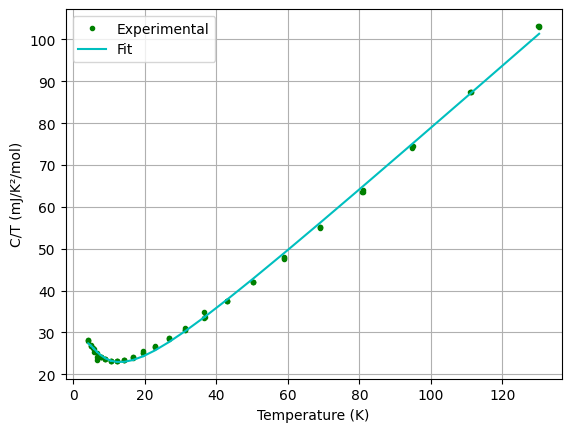

Beta, Gamma, n, E :  0.848534757508169 0.2344136468818058 0.0012855140803287948 7.497471094190909e-23


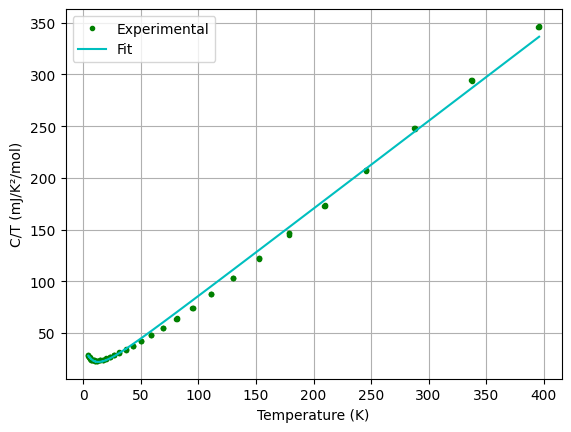

In [3]:
nonlinear_acoustic_fit.plot_fit_acoustic(0, 144, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS,
                                         bounds=([0.3, 0, 1e-3, 2e-23],[1, 10,5e-2, 8e-23]))

nonlinear_acoustic_fit.plot_fit_acoustic(0, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS,
                                         bounds=([0.1, 0, 1e-3, 2e-23],[1, 10,5e-2, 9e-23]))

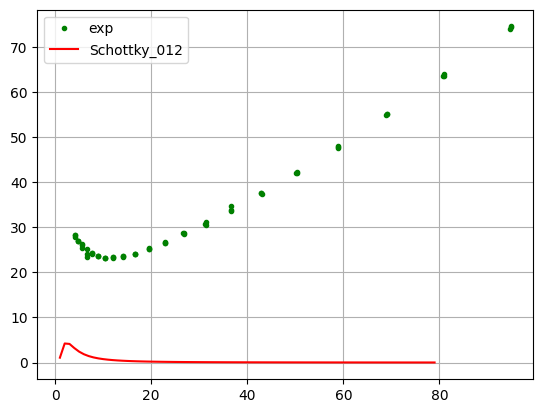

In [4]:
# Plotting the Schottky anomaly and the data on the same graph

squared_temp_bounded, hc_div_T_bounded = tools.tab_interval(cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 0, 100)
temp_test = np.arange(0, 80, 1)

y_fit_012_test = sch.schottky(temp_test,  7.897027012749528e-23, 0.0012118893327018793)

plt.figure()
plt.plot(squared_temp_bounded, hc_div_T_bounded, ".g", label="exp")
plt.plot(temp_test, y_fit_012_test, "-r", label="Schottky_012")
plt.grid(True)
plt.legend()

### Linear fit, Debye model

Optimizing the experimental data from 25 $K^2$ to 400 $K^2$, where the curve seems to be linear and the schottky anomaly tend to 0, according to the Debye model : $y(x) = \beta x + \gamma $

The values really deviate from the expected ones, the gamma cannot be less than 0.

Instead, we perform a linear fit from 5 K to 12 K, so the Debye model should describes better the data. We find $\beta = 0.7225 mJ/K⁴/mol$ and $\gamma = 6.66 mJ/K²/mol$, the corresponding Debye temperature is $327 K$

<Figure size 640x480 with 0 Axes>

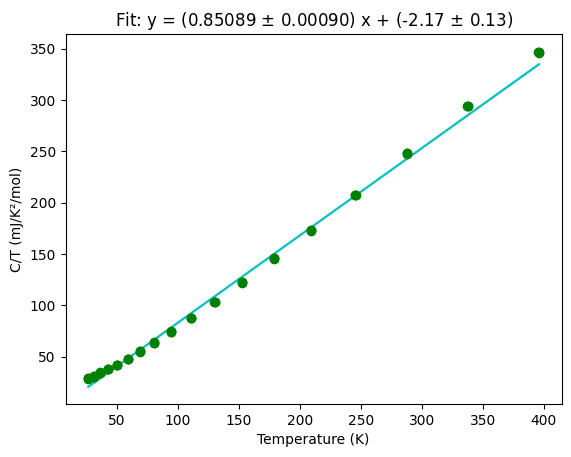

array([ 8.50885607e-01, -2.16922360e+00,  8.95197252e-04,  1.30380519e-01])

In [5]:
linear_acoustic_fit.linear_fit(25, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                               cnt.err_squared_temperature_ISIS,cnt.err_hc_div_temp_ISIS)

<Figure size 640x480 with 0 Axes>

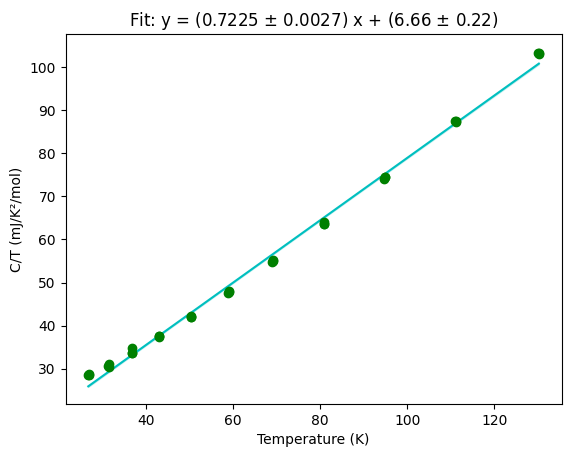

array([7.22456420e-01, 6.66220406e+00, 2.74370340e-03, 2.16234196e-01])

In [6]:
linear_acoustic_fit.linear_fit(25, 144, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                               cnt.err_squared_temperature_ISIS,cnt.err_hc_div_temp_ISIS)

### Non linear fit, Debye + Einstein model

Fitting the experimental data to the Debye model with a quadratic contribution in temperature, simulating possible optical modes. Optimizing the paramters of the numercial model $y(x) = \beta x + \gamma + \alpha x^2 + Cs(x)$

Between 0 and 20 K :

$\beta = 0.7376 mJ/K^4/mol$, donc $T_D = 324.77 K$ et $\gamma = 2.315 mJ/mol/K^2$

Beta, Gamma, n, E, nu :  0.7393871368221573 2.1301661978999347 0.0012559949234853891 7.999999999999999e-23 0.0003517981288070183


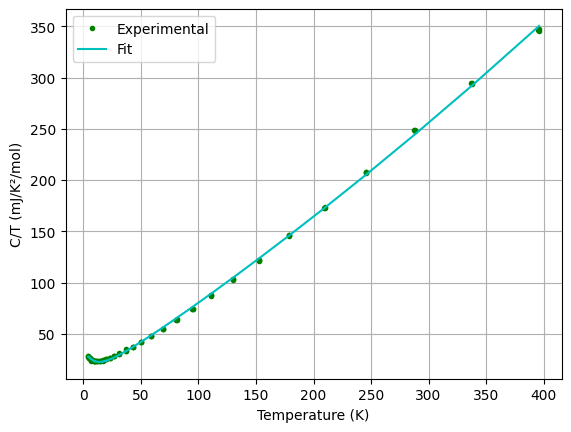

In [8]:
nonlinear_optic_fit.plot_fit_optic(0, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS, 
                                   bounds = ([0.2, 0, 1e-5, 5e-23, 0],[1, 10, 5e-2, 8e-23, 1]))

### Polynomial fit, Einstein model

Fitting the data after 25 $K^2$, so the Schottky contribution can be neglected

$\beta = 0.7109 mJ/K^4/mol$, donc $T_D = 328 K$ et $\gamma = 5.737 mJ/mol/K^2$

Alpha, Beta, Gamma :  0.00040440772318657385 0.7109603660353029 5.737356458511918


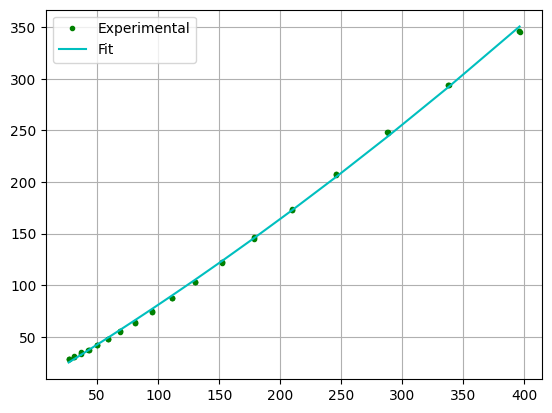

In [9]:
polynomial_optic_fit.plot_fit_quadra(25, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                                     bounds = ([0, 0, 0],[1, 1.5, 20]))